합성곱 신경망의 시각화

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [17]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism() #연산 결정성(op determinism) 활성화 => 연산의 결과가 항상 동일하도록 보장

가중치 시각화

In [18]:
from tensorflow import keras

In [19]:
#코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [20]:
model = keras.models.load_model('best-cnn-model.h5')

In [21]:
model.layers

In [22]:
#첫 번째 레이어인 Conv2D 레이어의 가중치(weights)에 접근

conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

#(3, 3, 1, 32): 3x3 크기의 입력 채널 1개를 가지고 32개의 필터를 가진 커널을 나타냄
#(32,): 32개의 요소를 가지고 있는 1차원 배열로 편향을 나타냄

(3, 3, 1, 32) (32,)


In [23]:
#Conv2D 레이어의 가중치 값들에 대한 평균과 표준편차를 출력

conv_weights = conv.weights[0].numpy() #Conv2D 레이어의 첫 번째 가중치(weights)를 Numpy 배열로 변환

print(conv_weights.mean(), conv_weights.std())

-0.019907376 0.2670874


In [24]:
import matplotlib.pyplot as plt

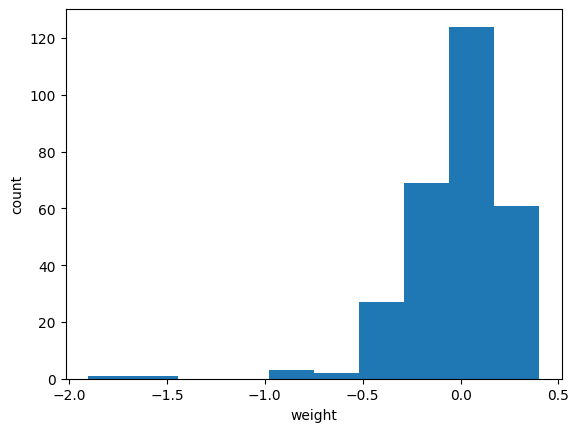

In [25]:
plt.hist(conv_weights.reshape(-1, 1)) #conv_weights 배열을 1차원 배열로 변환
plt.xlabel('weight') #x축을 가중치 값을 나타내는 'weight'로
plt.ylabel('count') #y축을 각 가중치 값의 빈도를 나타내는 'count'로
plt.show()

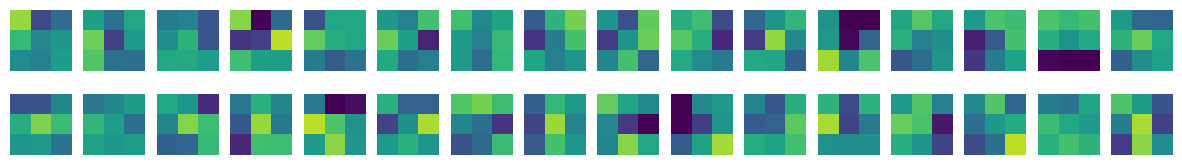

In [26]:
#Conv2D 레이어의 각 커널을 시각화 => 각 커널이 입력 이미지에서 어떤 특징을 감지하는지를 시각적으로 확인

fig, axs = plt.subplots(2, 16, figsize=(15,2)) #2x16 크기의 서브플롯 생성 (fig: 전체 그림을 나타내는 객체, axs: 각 서브플롯을 나타내는 배열)

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [27]:
no_training_model = keras.Sequential() #훈련되지 않은 모델 생성 (가중치 초기화. 학습을 진행하기 전까지는 모델의 예측 능력 X)

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))
#32개의 필터 사용, 각 필터의 크기 3x3, 입력 이미지의 크기 28x28, 채널 1, padding='same': 입력과 출력의 크기를 동일하게 유지하도록 패딩을 추가

In [28]:
#훈련되지 않은 모델의 첫 번째 레이어인 Conv2D 레이어의 가중치에 접근하여 해당 가중치의 형태를 출력

no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [29]:
no_training_weights = no_training_conv.weights[0].numpy() #훈련되지 않은 모델의 첫 번째 Conv2D 레이어의 가중치를 Numpy 배열로 변환

print(no_training_weights.mean(), no_training_weights.std())

-0.010310263 0.0773888


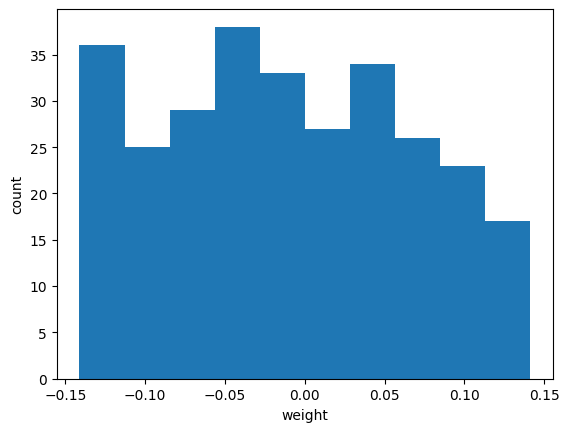

In [30]:
plt.hist(no_training_weights.reshape(-1, 1)) #1차원 배열로 변환. 가중치 값들의 분포를 시각화
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

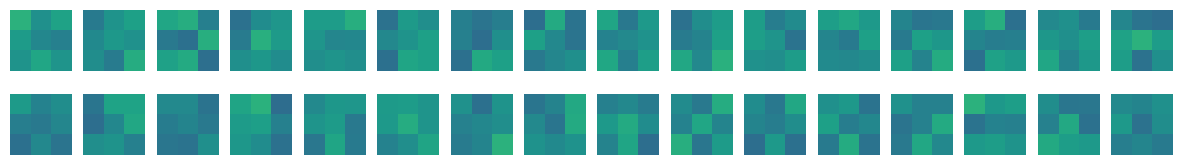

In [31]:
fig, axs = plt.subplots(2, 16, figsize=(15,2)) #2x16 크기의 서브플롯 생성

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off') #각 서브플롯의 축을 끔 => 각 이미지의 축을 제거하여 더 깔끔하게 표시됨

plt.show()

함수형 API

In [32]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [33]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

In [34]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

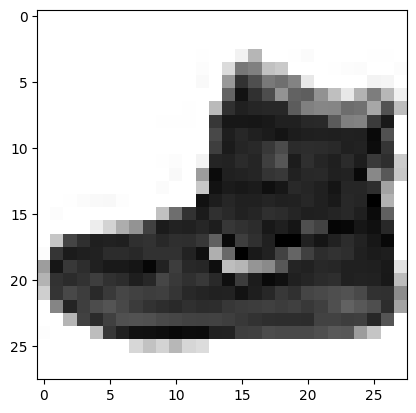

In [35]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [36]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 78ms/step


In [37]:
print(feature_maps.shape)

(1, 28, 28, 32)


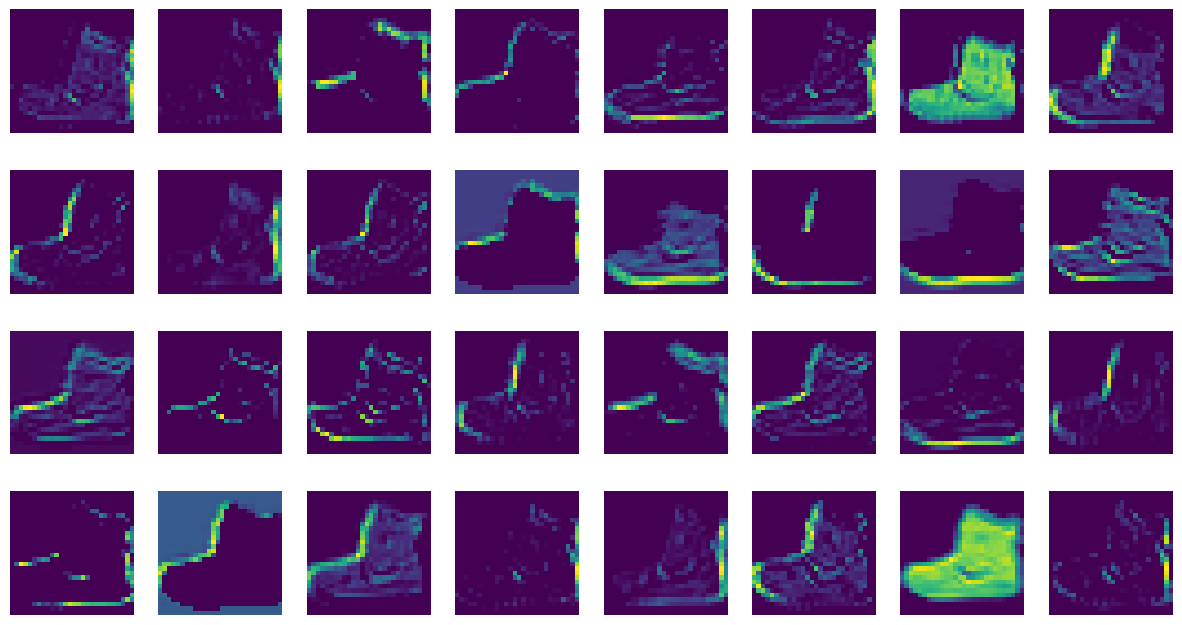

In [38]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [39]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [40]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 60ms/step


In [41]:
print(feature_maps.shape)

(1, 14, 14, 64)


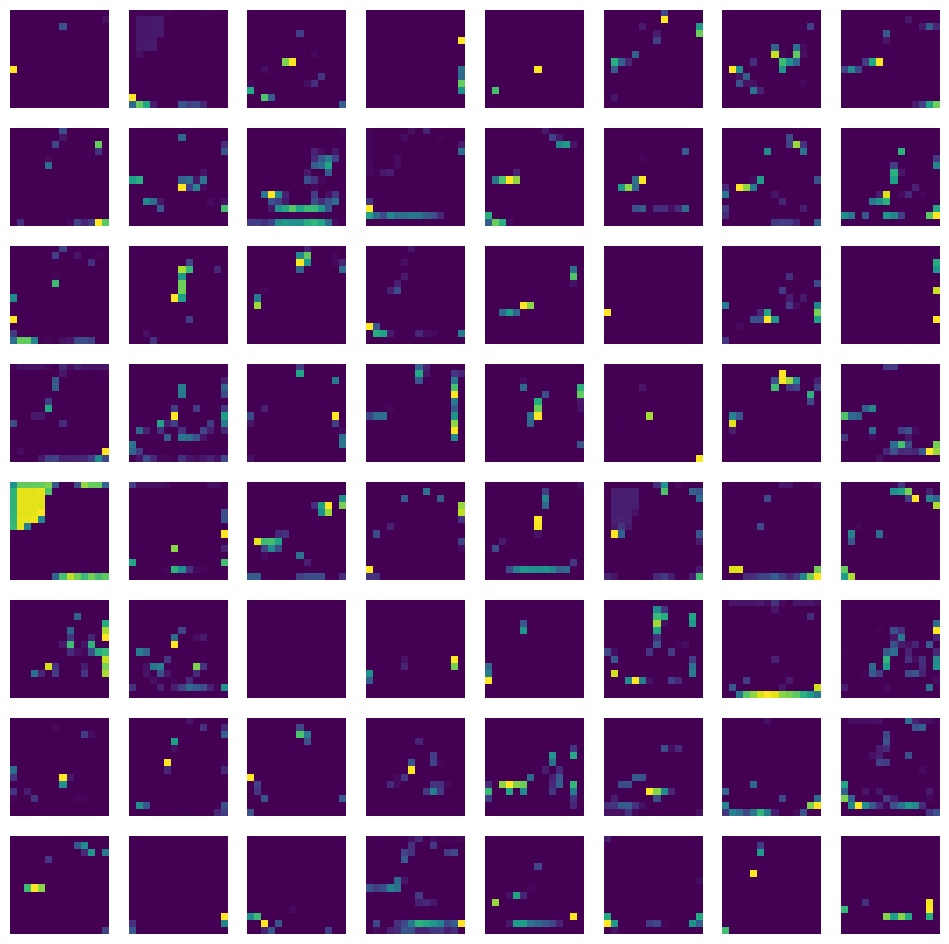

In [42]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()